Connected to Python 3.8.10

In [ ]:
# %%
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
import joblib
import os

# Create charts directory if it doesn't exist
os.makedirs('charts', exist_ok=True)

In [ ]:
# Step 1: Data Collection and Initial Analysis
df = pd.read_csv('Social Meida Dataset.csv')
print("\n=== Initial Dataset Info ===")
print(df.info())


=== Initial Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2002 entries, 0 to 2001
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Consumer ID                     2002 non-null   int64  
 1   Customer Name                   2002 non-null   object 
 2   Age                             2002 non-null   int64  
 3   Gender                          2002 non-null   object 
 4   Income (USD)                    2002 non-null   int64  
 5   Education Level                 2002 non-null   object 
 6   Social Media Usage (Hours/Day)  2002 non-null   float64
 7   Social Media Platforms          2002 non-null   object 
 8   Influence Level                 2002 non-null   object 
 9   Purchase Decision               2002 non-null   object 
 10  Product Category                1676 non-null   object 
 11  Specific Product                1676 non-null   object 
 12  Amou

In [ ]:
# Exploratory Data Analysis (EDA)
print("\n=== Basic Statistics ===")
print(df.describe())


=== Basic Statistics ===
       Consumer ID          Age   Income (USD)  \
count  2002.000000  2002.000000    2002.000000   
mean   1000.453047    32.176823   63471.778222   
std     577.233289     6.396971   18824.031334   
min       1.000000    19.000000   28000.000000   
25%     501.250000    28.000000   51000.000000   
50%    1000.500000    31.000000   60000.000000   
75%    1499.750000    36.000000   71000.000000   
max    2000.000000    52.000000  130000.000000   

       Social Media Usage (Hours/Day)  Amount Spent (USD)  
count                     2002.000000         2002.000000  
mean                         2.753746           89.497502  
std                          0.792965          182.302452  
min                          1.100000            0.000000  
25%                          2.100000           18.000000  
50%                          2.700000           35.000000  
75%                          3.200000           80.000000  
max                          5.300000      

In [ ]:
# Check for missing values
print("\n=== Missing Values Analysis ===")
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100
missing_info = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage': missing_percentage
})
print(missing_info)


=== Missing Values Analysis ===
                                Missing Values  Percentage
Consumer ID                                  0    0.000000
Customer Name                                0    0.000000
Age                                          0    0.000000
Gender                                       0    0.000000
Income (USD)                                 0    0.000000
Education Level                              0    0.000000
Social Media Usage (Hours/Day)               0    0.000000
Social Media Platforms                       0    0.000000
Influence Level                              0    0.000000
Purchase Decision                            0    0.000000
Product Category                           326   16.283716
Specific Product                           326   16.283716
Amount Spent (USD)                           0    0.000000
Brand Name                                 326   16.283716
City                                         1    0.049950


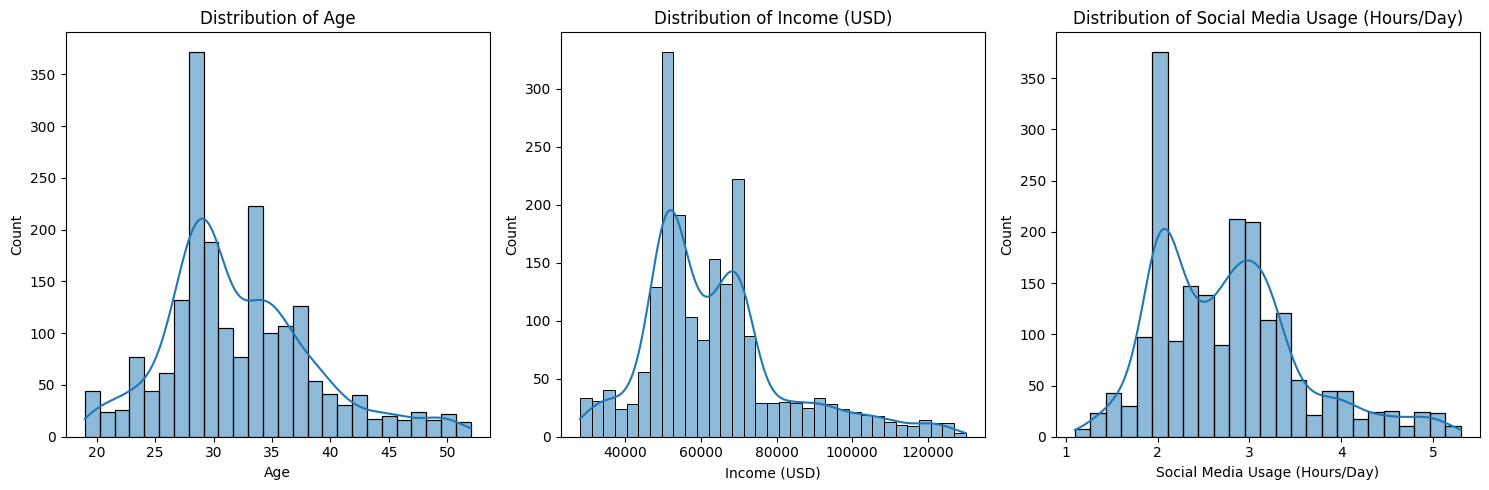

In [ ]:
# Distribution of numerical variables
numerical_cols = ['Age', 'Income (USD)', 'Social Media Usage (Hours/Day)']
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.savefig('charts/numerical_distributions.png')
plt.show()

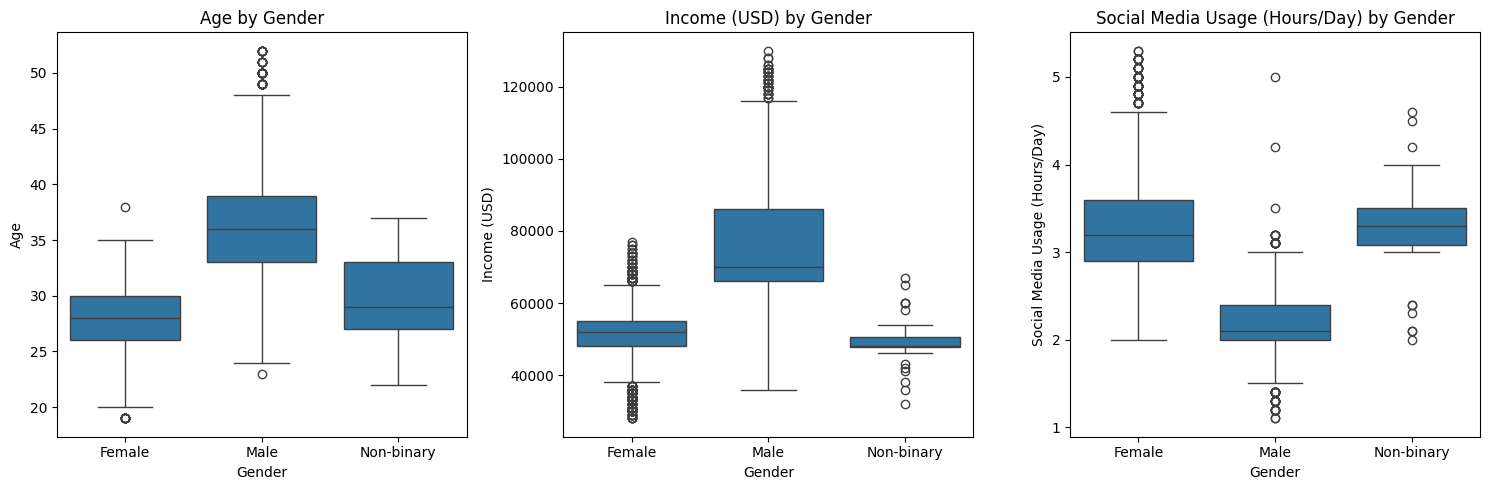

In [ ]:
# Box plots for numerical variables by gender
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=df, x='Gender', y=col)
    plt.title(f'{col} by Gender')
plt.tight_layout()
plt.savefig('charts/numerical_by_gender.png')
plt.show()

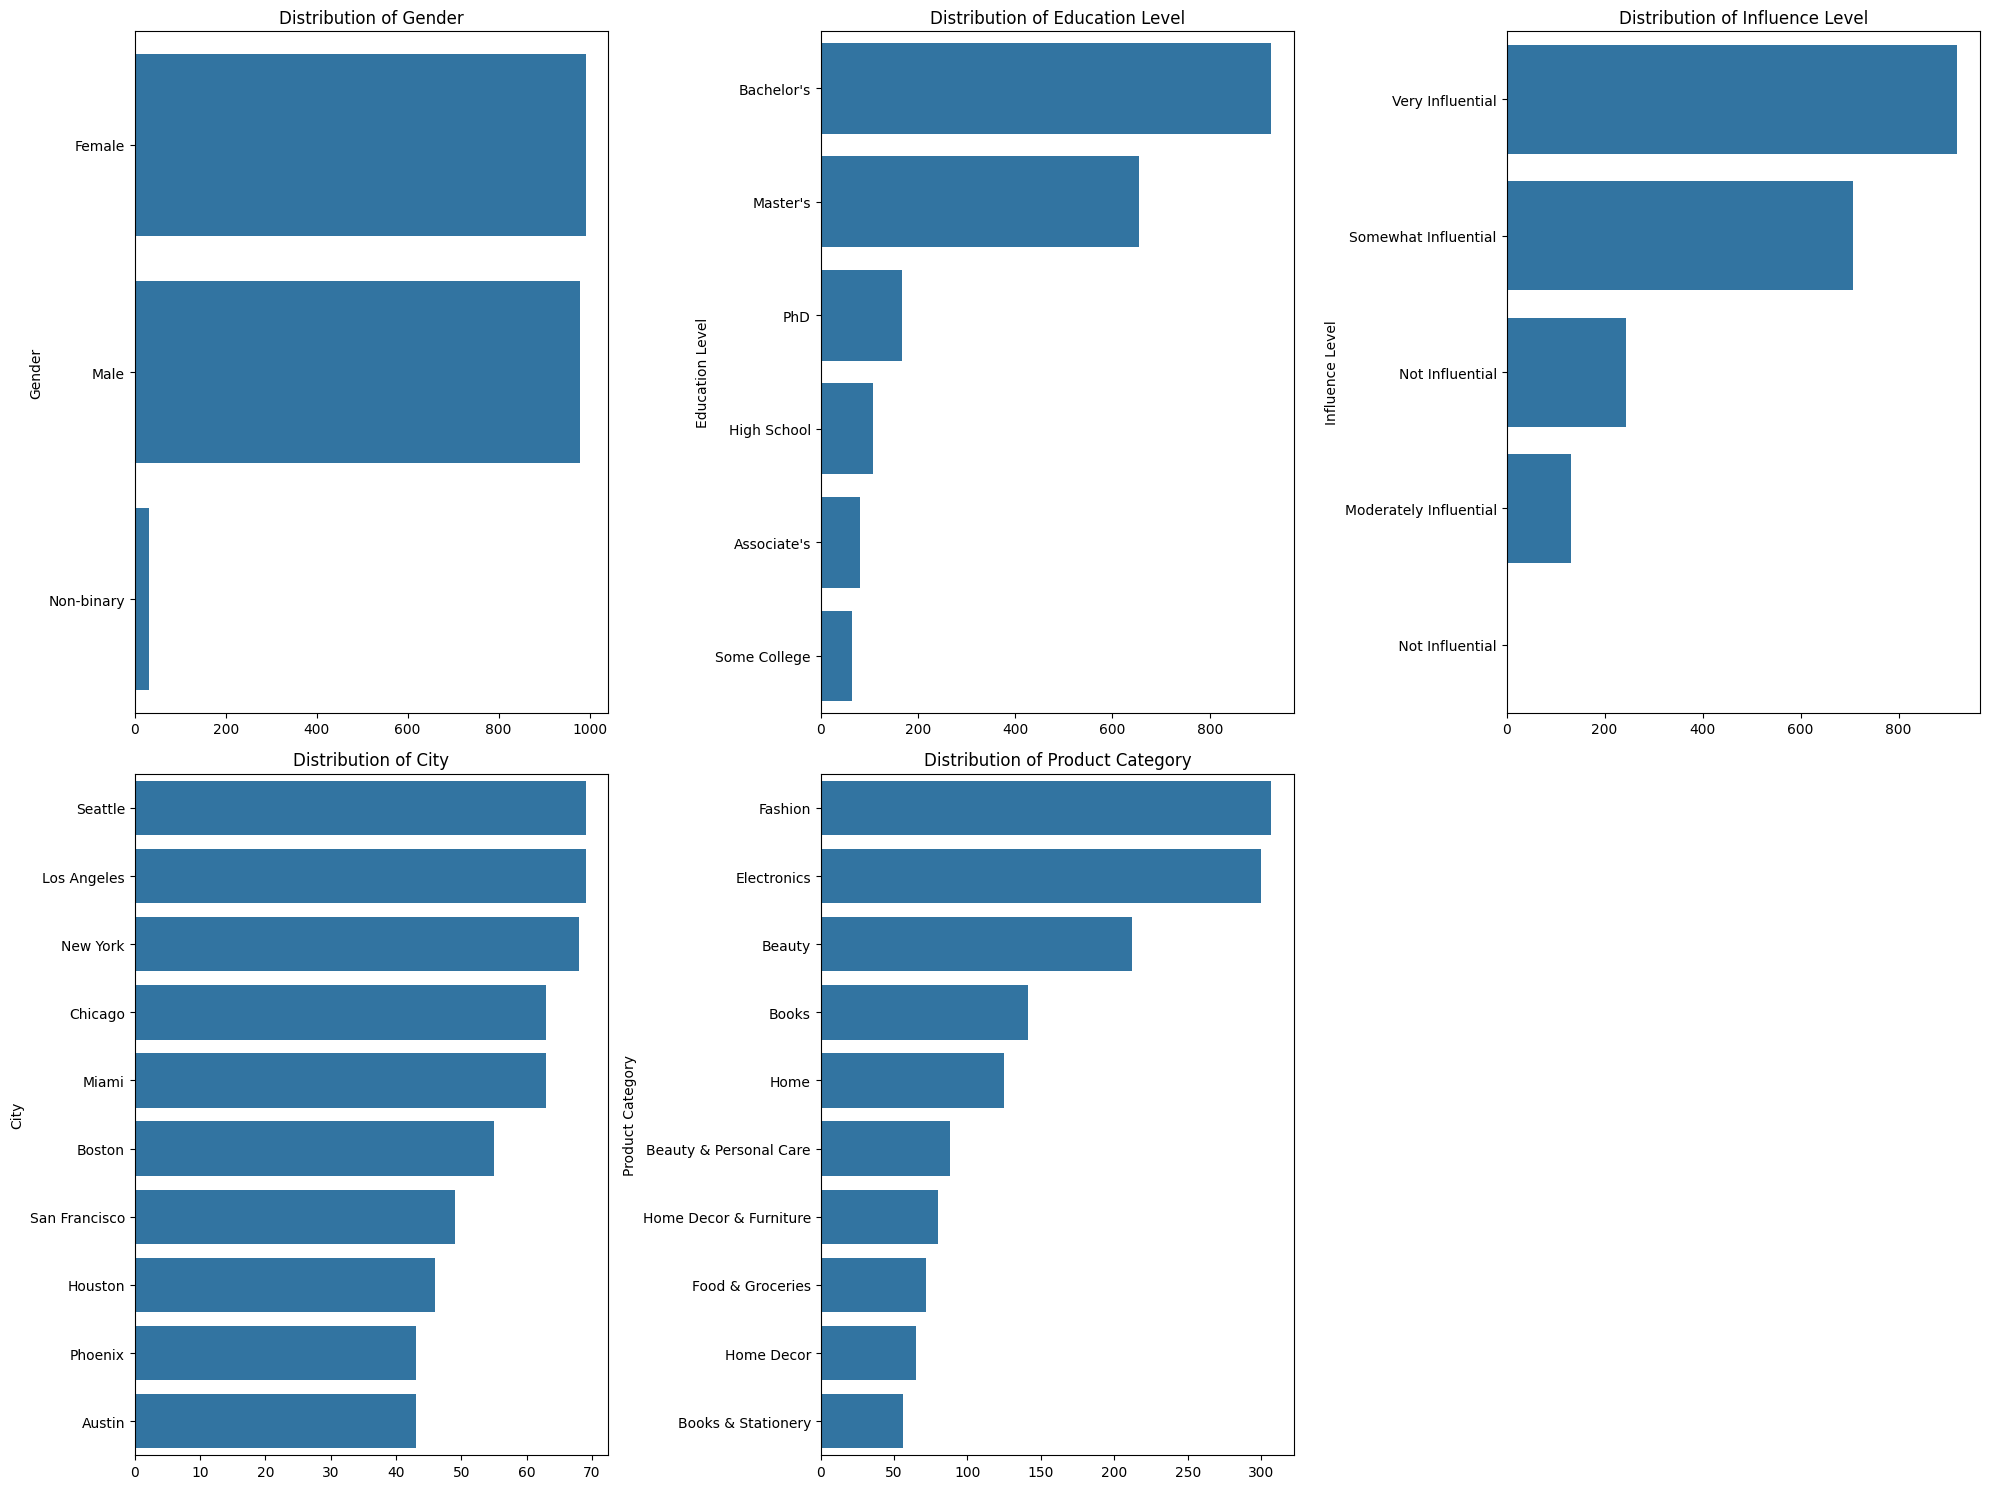

In [ ]:
# Categorical variables analysis
categorical_cols = ['Gender', 'Education Level', 'Influence Level', 'City', 'Product Category']
plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    value_counts = df[col].value_counts()
    if len(value_counts) > 10:  # For cities, show top 10
        value_counts = value_counts.head(10)
    sns.barplot(x=value_counts.values, y=value_counts.index)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.savefig('charts/categorical_distributions.png')
plt.show()

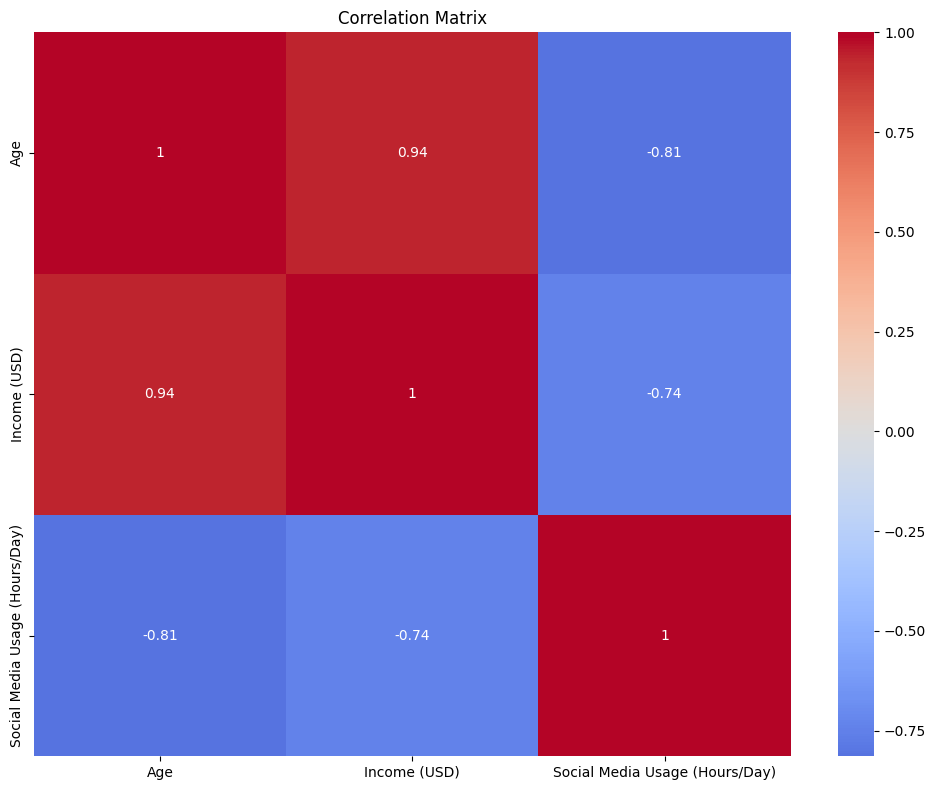

In [ ]:
# Correlation analysis
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig('charts/correlation_matrix.png')
plt.show()

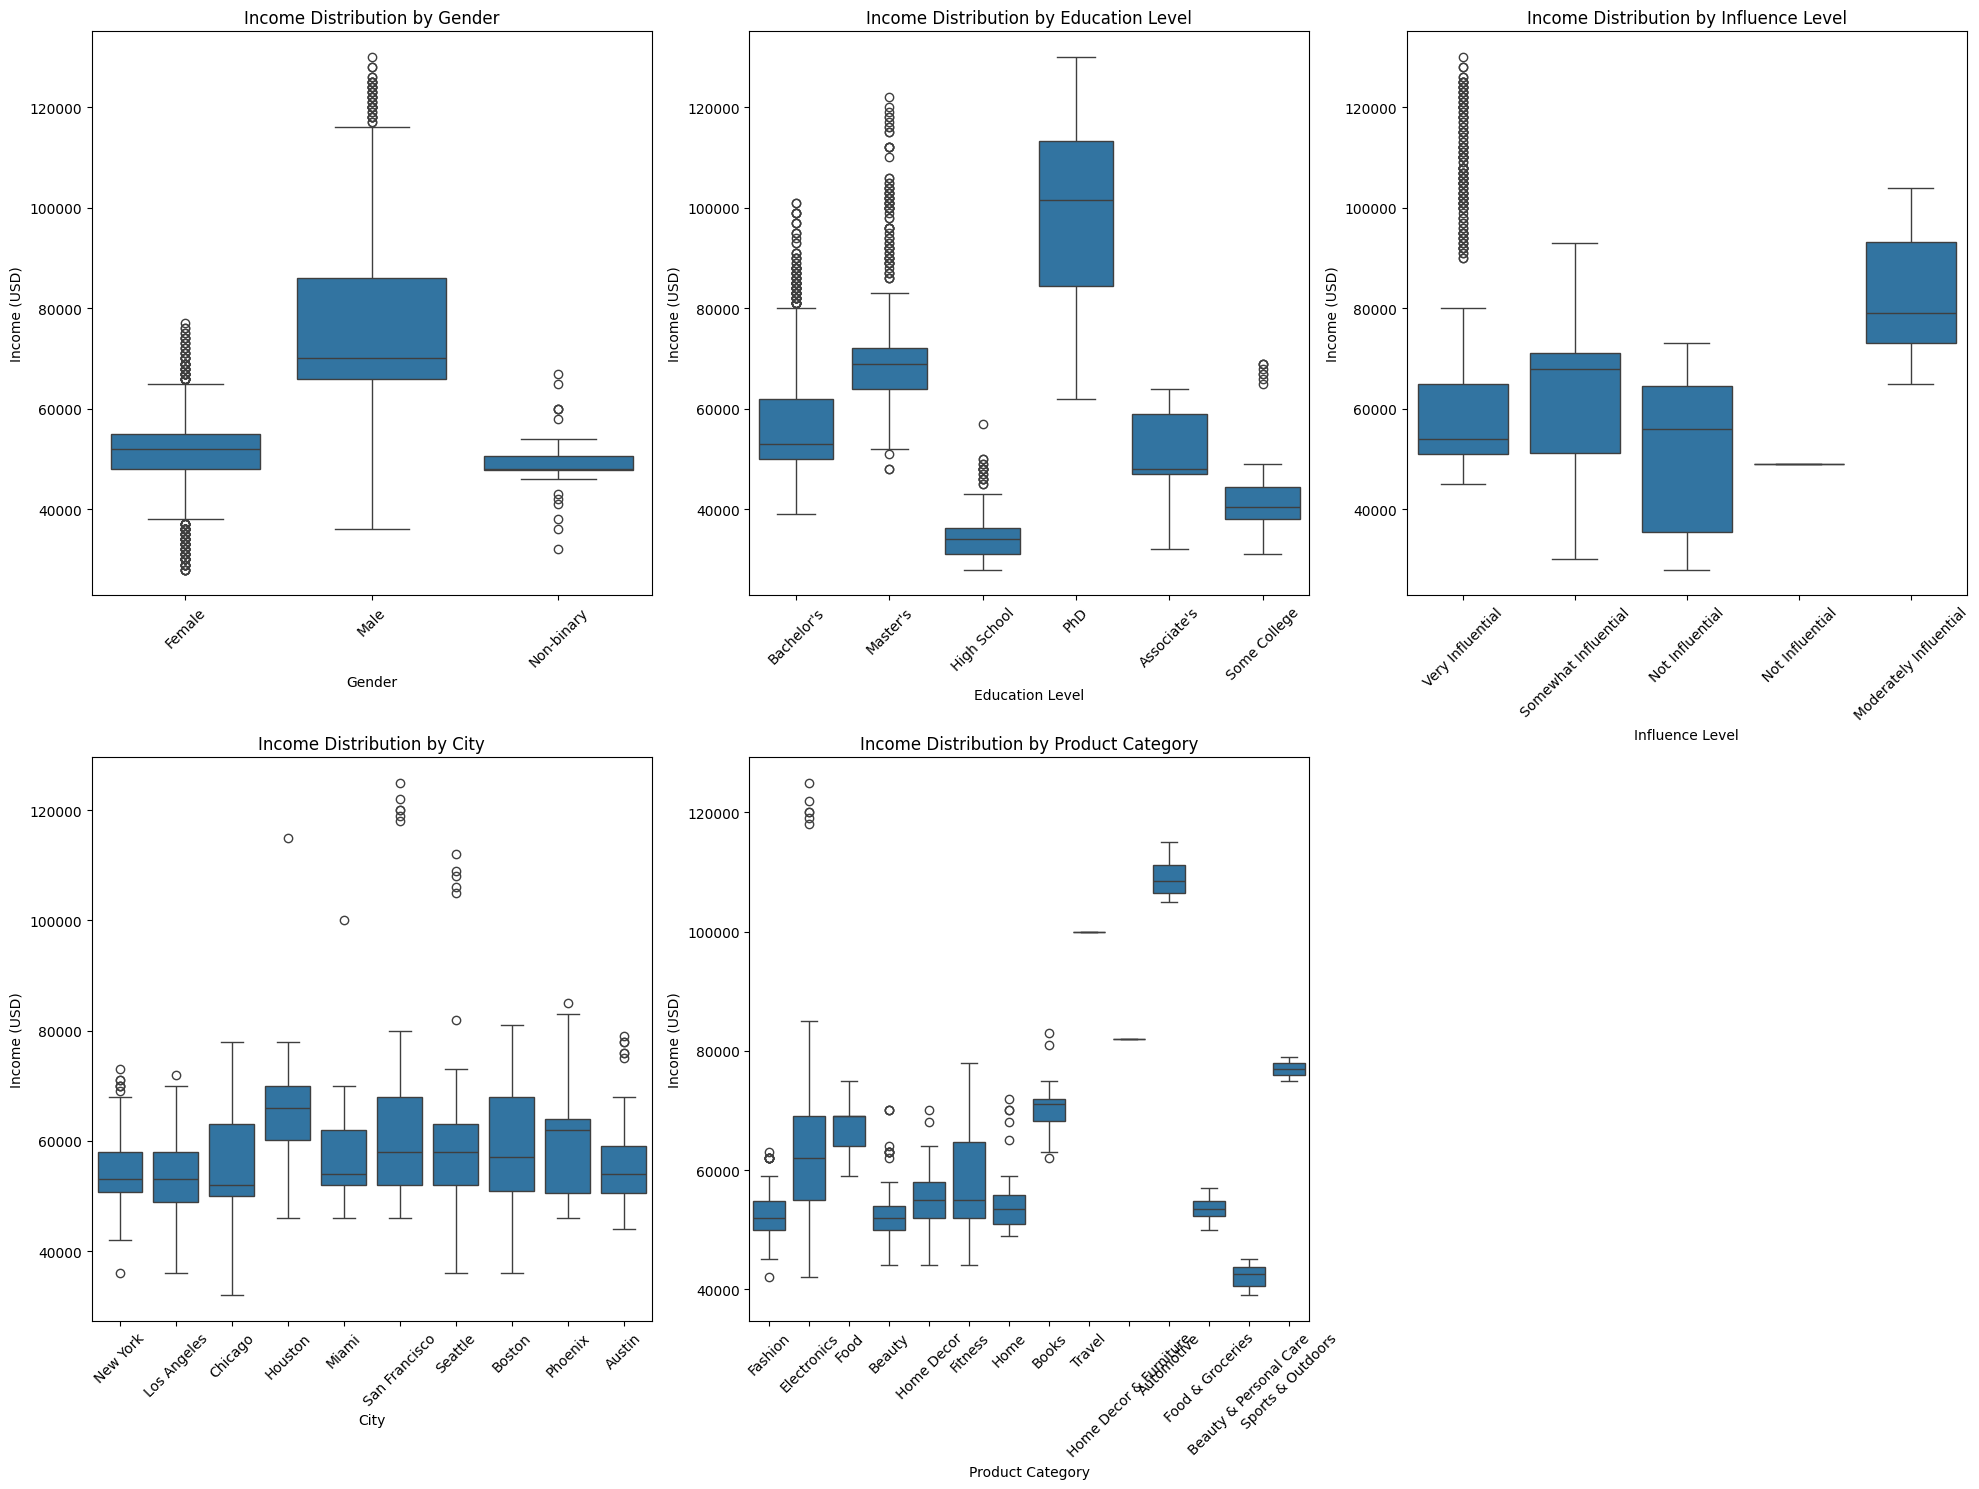

In [ ]:
# Income analysis by different categories
plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    if len(df[col].unique()) > 10:  # For cities, show top 10
        top_cities = df['City'].value_counts().head(10).index
        data = df[df['City'].isin(top_cities)]
        sns.boxplot(data=data, x=col, y='Income (USD)')
    else:
        sns.boxplot(data=df, x=col, y='Income (USD)')
    plt.xticks(rotation=45)
    plt.title(f'Income Distribution by {col}')
plt.tight_layout()
plt.savefig('charts/income_by_categories.png')
plt.show()

<Figure size 1200x600 with 0 Axes>

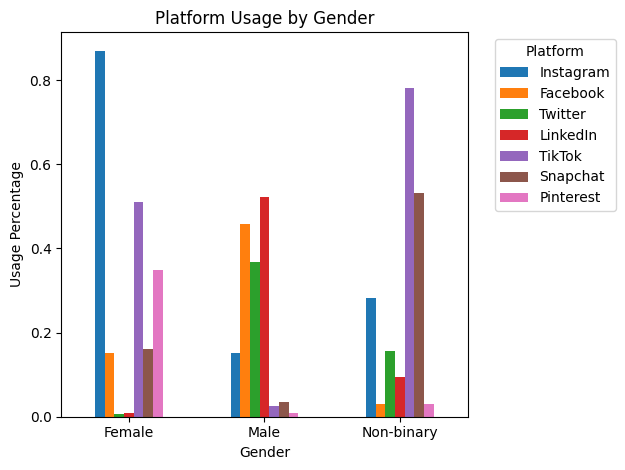

In [ ]:
# Social media usage patterns
platforms = ['Instagram', 'Facebook', 'Twitter', 'LinkedIn', 'TikTok', 'Snapchat', 'Pinterest']
platform_usage = pd.DataFrame()
for platform in platforms:
    platform_usage[platform] = df['Social Media Platforms'].str.contains(platform, case=False).astype(int)

# Platform usage by gender
plt.figure(figsize=(12, 6))
platform_usage_by_gender = platform_usage.groupby(df['Gender']).mean()
platform_usage_by_gender.plot(kind='bar')
plt.title('Platform Usage by Gender')
plt.xlabel('Gender')
plt.ylabel('Usage Percentage')
plt.xticks(rotation=0)
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.savefig('charts/platform_usage_by_gender.png')
plt.show()

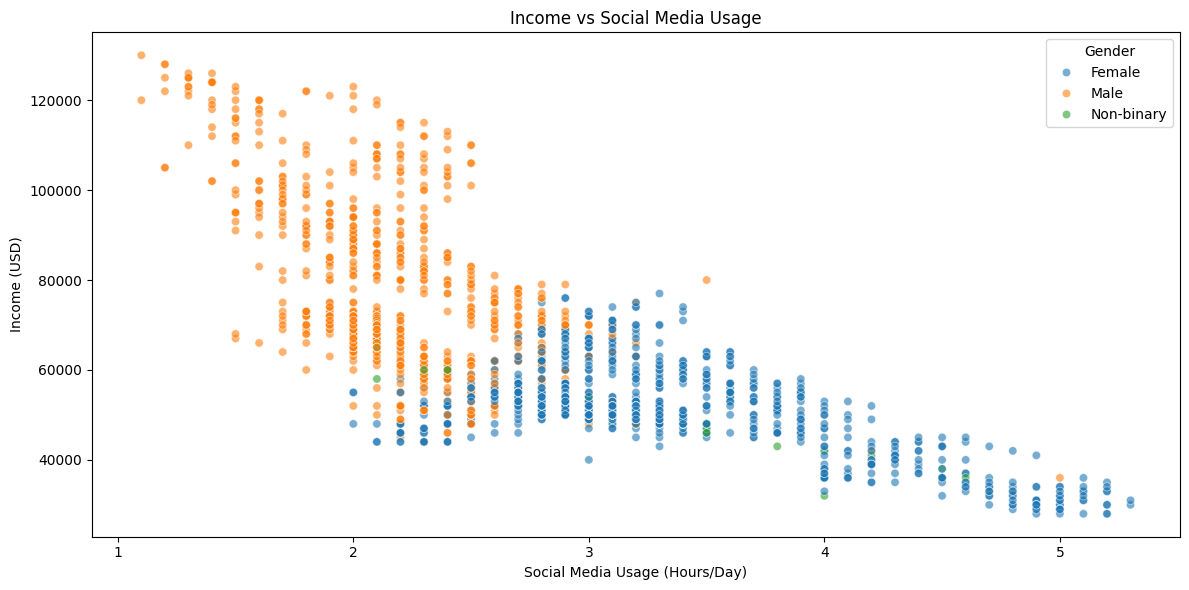

In [ ]:
# Income vs Social Media Usage
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Social Media Usage (Hours/Day)', y='Income (USD)', 
                hue='Gender', alpha=0.6)
plt.title('Income vs Social Media Usage')
plt.tight_layout()
plt.savefig('charts/income_vs_usage.png')
plt.show()

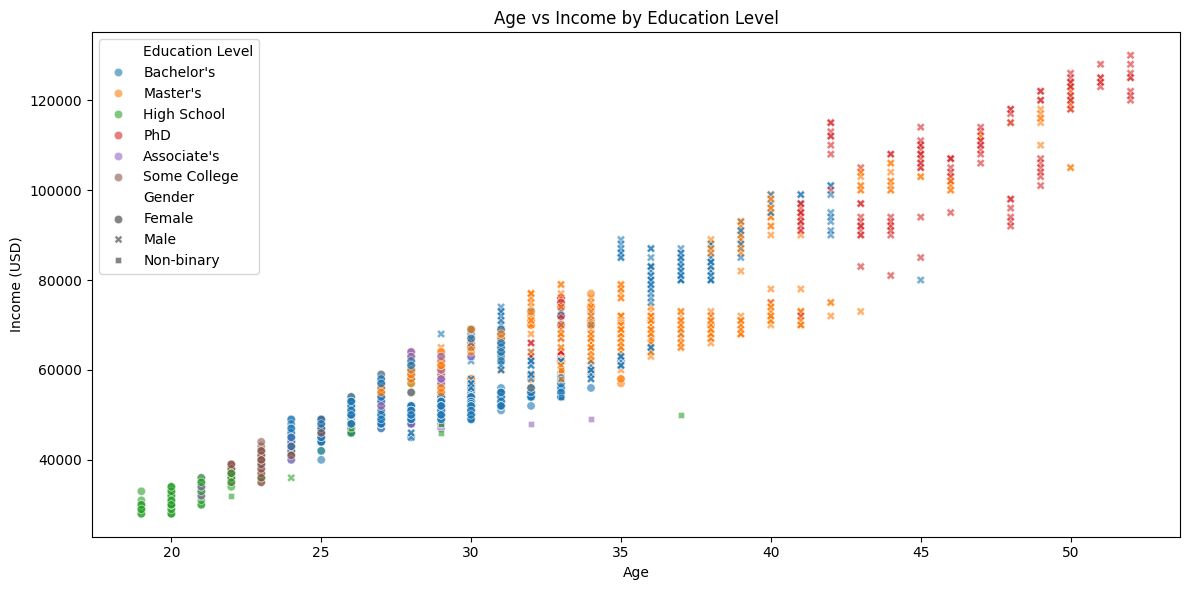

In [ ]:
# Age vs Income by Education Level
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Age', y='Income (USD)', 
                hue='Education Level', style='Gender', alpha=0.6)
plt.title('Age vs Income by Education Level')
plt.tight_layout()
plt.savefig('charts/age_vs_income.png')
plt.show()

In [ ]:
# Key Insights
print("\n=== Key Insights ===")
print(f"Average Age: {df['Age'].mean():.1f} years")
print(f"Average Income: ${df['Income (USD)'].mean():.2f}")
print(f"Average Social Media Usage: {df['Social Media Usage (Hours/Day)'].mean():.1f} hours/day")
print(f"\nMost Common Education Level: {df['Education Level'].mode()[0]}")
print(f"Most Common Product Category: {df['Product Category'].mode()[0]}")
print(f"Most Common City: {df['City'].mode()[0]}")


=== Key Insights ===
Average Age: 32.2 years
Average Income: $63471.78
Average Social Media Usage: 2.8 hours/day

Most Common Education Level: Bachelor's
Most Common Product Category: Fashion
Most Common City: Los Angeles


In [ ]:
# Step 2: Data Cleaning
# Check for missing values
print("\n=== Missing Values ===")
print(df.isnull().sum())

# Remove rows with missing values
df_clean = df.dropna()


=== Missing Values ===
Consumer ID                         0
Customer Name                       0
Age                                 0
Gender                              0
Income (USD)                        0
Education Level                     0
Social Media Usage (Hours/Day)      0
Social Media Platforms              0
Influence Level                     0
Purchase Decision                   0
Product Category                  326
Specific Product                  326
Amount Spent (USD)                  0
Brand Name                        326
City                                1
dtype: int64


In [ ]:
# Step 3: Feature Engineering
# Create a proper copy of the DataFrame
df_clean = df_clean.copy()

# Extract platform counts using .loc
df_clean.loc[:, 'Platform_Count'] = df_clean['Social Media Platforms'].apply(lambda x: len(str(x).split(',')))

# Create binary features for each platform using .loc
platforms = ['Instagram', 'Facebook', 'Twitter', 'LinkedIn', 'TikTok', 'Snapchat', 'Pinterest']
for platform in platforms:
    df_clean.loc[:, f'Uses_{platform}'] = df_clean['Social Media Platforms'].str.contains(platform, case=False).astype(int)

# Add additional features
# 1. Age groups
df_clean.loc[:, 'Age_Group'] = pd.cut(df_clean['Age'], 
                                    bins=[0, 25, 35, 45, 60, float('inf')],
                                    labels=['18-25', '26-35', '36-45', '46-60', '60+'])

# 2. Usage intensity
df_clean.loc[:, 'Usage_Intensity'] = pd.cut(df_clean['Social Media Usage (Hours/Day)'],
                                          bins=[0, 1, 2, 3, 4, float('inf')],
                                          labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# 3. Platform combinations
df_clean.loc[:, 'Uses_Multiple_Platforms'] = (df_clean['Platform_Count'] > 2).astype(int)

# 4. Popular platform combinations
df_clean.loc[:, 'Uses_Instagram_Facebook'] = ((df_clean['Uses_Instagram'] == 1) & 
                                            (df_clean['Uses_Facebook'] == 1)).astype(int)

# 5. Professional vs Personal platforms
df_clean.loc[:, 'Professional_Platforms'] = (df_clean['Uses_LinkedIn'] + 
                                           df_clean['Uses_Twitter']).clip(upper=1)
df_clean.loc[:, 'Personal_Platforms'] = (df_clean['Uses_Instagram'] + 
                                       df_clean['Uses_Facebook'] + 
                                       df_clean['Uses_Snapchat']).clip(upper=1)

# Print feature statistics
print("\n=== Feature Engineering Summary ===")
print(f"Average platform count: {df_clean['Platform_Count'].mean():.2f}")
print("\nPlatform Usage Statistics:")
for platform in platforms:
    usage_percentage = df_clean[f'Uses_{platform}'].mean() * 100
    print(f"{platform}: {usage_percentage:.1f}%")


=== Feature Engineering Summary ===
Average platform count: 2.07

Platform Usage Statistics:
Instagram: 56.6%
Facebook: 29.8%
Twitter: 15.6%
LinkedIn: 26.5%
TikTok: 28.4%
Snapchat: 9.7%
Pinterest: 21.2%


In [ ]:
# Step 4: Data Preprocessing
# Encode categorical variables
label_encoders = {}
categorical_columns = ['Gender', 'Education Level', 'Influence Level', 'City', 'Product Category', 'Age_Group', 'Usage_Intensity']

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df_clean.loc[:, f'{column}_encoded'] = label_encoders[column].fit_transform(df_clean[column])

# Select features for the model
features = ['Age', 'Gender_encoded', 'Education Level_encoded', 
           'Social Media Usage (Hours/Day)', 'Platform_Count',
           'Influence Level_encoded', 'City_encoded', 'Product Category_encoded',
           'Age_Group_encoded', 'Usage_Intensity_encoded', 'Uses_Multiple_Platforms',
           'Uses_Instagram_Facebook', 'Professional_Platforms', 'Personal_Platforms'] + \
          [f'Uses_{platform}' for platform in platforms]

X = df_clean[features]
y = df_clean['Income (USD)']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Step 5: Model Training
# Initialize the model
rf_regressor = RandomForestRegressor(random_state=42)

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, 
                          cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Get the best model
best_rf = grid_search.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits



=== Model Evaluation ===
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
R2 Score: 0.9862
Mean Absolute Error: $1508.14
Root Mean Squared Error: $2143.82


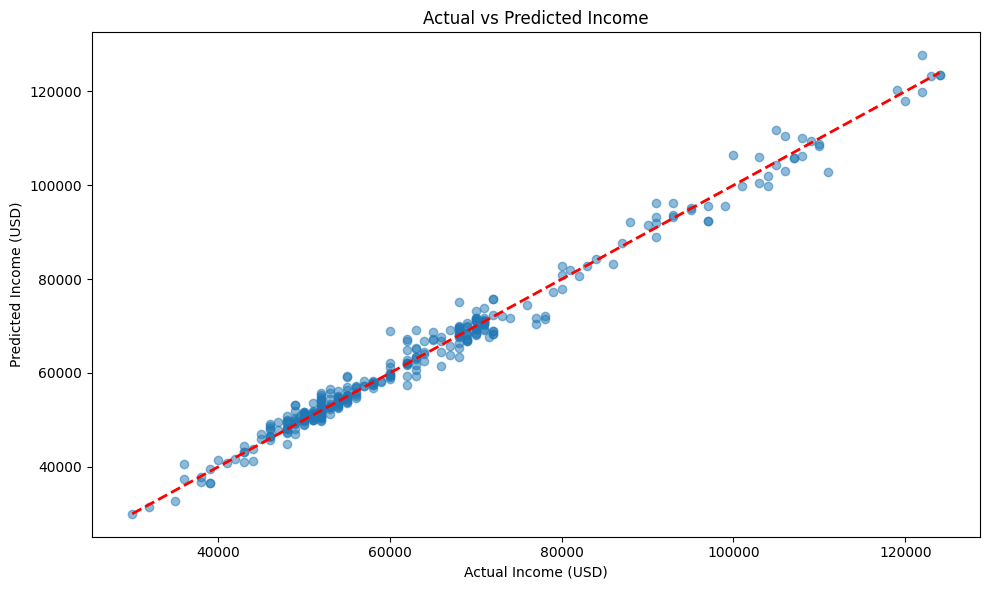

In [ ]:
# Step 6: Model Evaluation
# Make predictions
y_pred = best_rf.predict(X_test_scaled)

# Print evaluation metrics
print("\n=== Model Evaluation ===")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")
print(f"Mean Absolute Error: ${mean_absolute_error(y_test, y_pred):.2f}")
print(f"Root Mean Squared Error: ${np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Income')
plt.xlabel('Actual Income (USD)')
plt.ylabel('Predicted Income (USD)')
plt.tight_layout()
plt.savefig('charts/income_prediction.png')
plt.show()

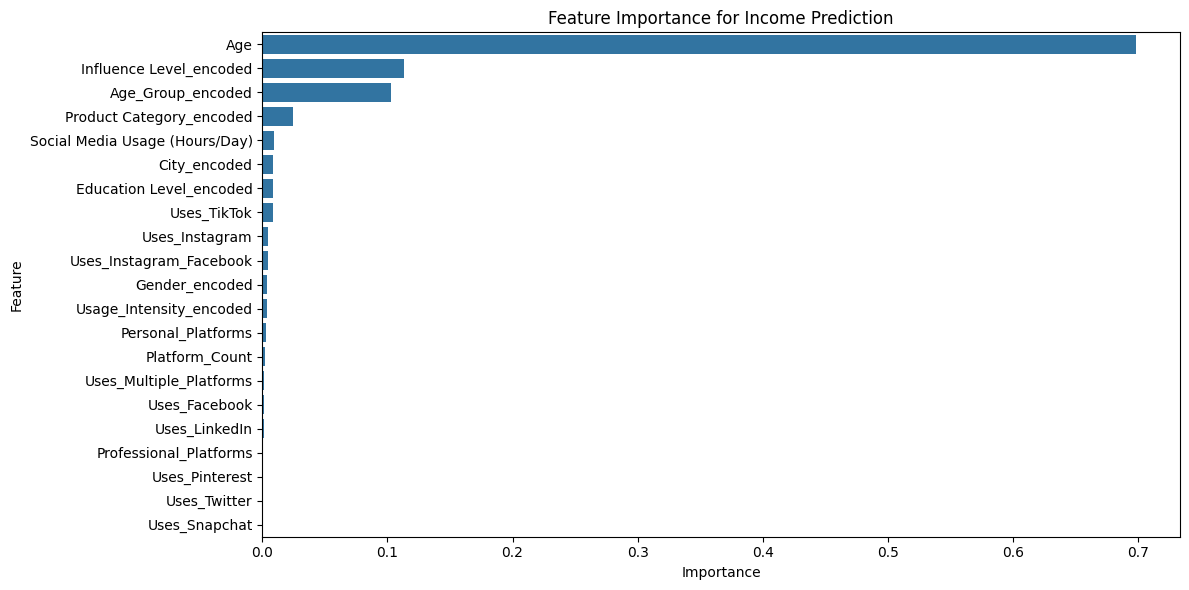

In [ ]:
# Step 7: Feature Importance Analysis
# Get feature importances
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': best_rf.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature')
plt.title('Feature Importance for Income Prediction')
plt.tight_layout()
plt.savefig('charts/feature_importance.png')
plt.show()

In [ ]:
# Save the model and preprocessing objects
joblib.dump(best_rf, 'income_regressor_model.joblib')
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(label_encoders, 'label_encoders.joblib')

['label_encoders.joblib']

In [ ]:
# Example of making predictions on new data
def predict_income(new_data):
    # Load the saved model and preprocessing objects
    model = joblib.load('income_regressor_model.joblib')
    scaler = joblib.load('scaler.joblib')
    label_encoders = joblib.load('label_encoders.joblib')
    
    # Create a copy of the input data
    new_data = new_data.copy()
    
    # Create Age_Group
    new_data['Age_Group'] = pd.cut(new_data['Age'], 
                                  bins=[0, 25, 35, 45, 60, float('inf')],
                                  labels=['18-25', '26-35', '36-45', '46-60', '60+'])
    
    # Create Usage_Intensity
    new_data['Usage_Intensity'] = pd.cut(new_data['Social Media Usage (Hours/Day)'],
                                        bins=[0, 1, 2, 3, 4, float('inf')],
                                        labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
    
    # Calculate platform count and create binary features
    new_data['Platform_Count'] = new_data['Social Media Platforms'].apply(lambda x: len(str(x).split(',')))
    for platform in platforms:
        new_data[f'Uses_{platform}'] = new_data['Social Media Platforms'].str.contains(platform, case=False).astype(int)
    
    # Create additional features
    new_data['Uses_Multiple_Platforms'] = (new_data['Platform_Count'] > 2).astype(int)
    new_data['Uses_Instagram_Facebook'] = ((new_data['Uses_Instagram'] == 1) & 
                                         (new_data['Uses_Facebook'] == 1)).astype(int)
    new_data['Professional_Platforms'] = (new_data['Uses_LinkedIn'] + 
                                        new_data['Uses_Twitter']).clip(upper=1)
    new_data['Personal_Platforms'] = (new_data['Uses_Instagram'] + 
                                    new_data['Uses_Facebook'] + 
                                    new_data['Uses_Snapchat']).clip(upper=1)
    
    # Preprocess the new data
    for column in categorical_columns:
        new_data[f'{column}_encoded'] = label_encoders[column].transform(new_data[column])
    
    # Select features
    X_new = new_data[features]
    
    # Scale features
    X_new_scaled = scaler.transform(X_new)
    
    # Make prediction
    prediction = model.predict(X_new_scaled)
    
    return prediction

In [ ]:
# Example usage:
new_data = pd.DataFrame({
    'Age': [30],
    'Gender': ['Male'],
    'Education Level': ['Bachelor\'s'],
    'Social Media Usage (Hours/Day)': [2.5],
    'Social Media Platforms': ['Instagram, Facebook, Twitter'],
    'Influence Level': ['Somewhat Influential'],
    'City': ['New York'],
    'Product Category': ['Electronics']
})

In [ ]:
# Make prediction
prediction = predict_income(new_data)
print(f"Predicted Income: ${prediction[0]:.2f}")

Predicted Income: $58417.78
